In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [4]:
days = ['MONDAY','TUESDAY','WEDNESDAY','THURSDAY','FRIDAY','SATURDAY','SUNDAY']

def add_date_column(df,start_datetime):
    crash_days = df["Day of Week"].tolist()
    last_crash_day = crash_days[0]
    date = start_datetime
    date_column = []
    
    for crash_day in crash_days:
        crash_day = crash_day.upper()
        if crash_day != last_crash_day:
            # skips the appropriate amount of dates if there is a skip in days < 7
            prev_index = days.index(last_crash_day)
            curr_index = days.index(crash_day)
            to_add = curr_index - prev_index
            if to_add < 0:
                to_add += 7
            date += datetime.timedelta(days=to_add)
            last_crash_day = crash_day
        date_column.append(date.strftime('%Y-%m-%d'))
        
    df["Date"] = date_column
        

def get_date_counts(df):
    counts = df[["Date","Day of Week","Crash ID"]].groupby(["Date","Day of Week"])["Crash ID"].nunique()
    return counts.reset_index().rename(columns={"Crash ID": "Num Crashes"})

In [5]:
df_2020 = pd.read_csv("~/Desktop/tx_dps_april_may_2020.csv")
df_2019 = pd.read_csv("~/Desktop/tx_dps_april_may_2019.csv")

add_date_column(df_2019, datetime.datetime(2019, 4, 1))
add_date_column(df_2020, datetime.datetime(2020, 4, 1))

In [6]:
df_2019.head()

,Crash ID,City,County,Crash Death Count,Crash Year,Day of Week,Contributing Factor 1,Contributing Factor 2,Contributing Factor 3,Driver Alcohol Result,...,Unit Possible Injury Count,Vehicle Make,Vehicle Model Name,Vehicle Model Year,Person Age,Person Helmet,Person Injury Severity,Person Time of Death,Person Total Injury Count,Date
0,16978449,SCHERTZ,GUADALUPE,0,2019,MONDAY,73 - ROAD RAGE,4 - CHANGED LANE WHEN UNSAFE,No Data,No Data,...,0,NISSAN,ALTIMA (NISSAN),2015,20,97 - NOT APPLICABLE,N - NOT INJURED,No Data,0,2019-04-01
1,16978449,SCHERTZ,GUADALUPE,0,2019,MONDAY,73 - ROAD RAGE,No Data,No Data,No Data,...,0,CHEVROLET,CRUZE (CHEVROLET),2013,19,97 - NOT APPLICABLE,N - NOT INJURED,No Data,0,2019-04-01
2,16978449,SCHERTZ,GUADALUPE,0,2019,MONDAY,73 - ROAD RAGE,No Data,No Data,No Data,...,0,CHEVROLET,CRUZE (CHEVROLET),2013,21,97 - NOT APPLICABLE,N - NOT INJURED,No Data,0,2019-04-01
3,16978449,SCHERTZ,GUADALUPE,0,2019,MONDAY,No Data,No Data,No Data,No Data,...,1,FORD,TRANSIT (FORD),2017,50,97 - NOT APPLICABLE,C - POSSIBLE INJURY,No Data,1,2019-04-01
4,16978449,SCHERTZ,GUADALUPE,0,2019,MONDAY,No Data,No Data,No Data,No Data,...,1,FORD,TRANSIT (FORD),2017,48,97 - NOT APPLICABLE,B - NON-INCAPACITATING INJURY,No Data,1,2019-04-01


In [7]:
df_2019.tail()

,Crash ID,City,County,Crash Death Count,Crash Year,Day of Week,Contributing Factor 1,Contributing Factor 2,Contributing Factor 3,Driver Alcohol Result,...,Unit Possible Injury Count,Vehicle Make,Vehicle Model Name,Vehicle Model Year,Person Age,Person Helmet,Person Injury Severity,Person Time of Death,Person Total Injury Count,Date
129048,17104877,SAN ANTONIO,BEXAR,0,2019,FRIDAY,No Data,No Data,No Data,No Data,...,1,BMW,X3 (BMW),2019,22,97 - NOT APPLICABLE,N - NOT INJURED,No Data,0,2019-12-06
129049,17169649,BIG SPRING,HOWARD,0,2019,FRIDAY,26 - FAILED TO PASS TO LEFT SAFELY,No Data,No Data,No Data,...,0,FORD,F150 (FORD),2014,47,97 - NOT APPLICABLE,N - NOT INJURED,No Data,0,2019-12-06
129050,17169649,BIG SPRING,HOWARD,0,2019,FRIDAY,26 - FAILED TO PASS TO LEFT SAFELY,No Data,No Data,No Data,...,0,FORD,F150 (FORD),2014,47,97 - NOT APPLICABLE,N - NOT INJURED,No Data,0,2019-12-06
129051,17169649,BIG SPRING,HOWARD,0,2019,FRIDAY,No Data,No Data,No Data,No Data,...,0,DODGE,RAM 3500 (DODGE),2004,No Data,97 - NOT APPLICABLE,99 - UNKNOWN,No Data,0,2019-12-06
129052,17170202,DALLAS,DALLAS,0,2019,FRIDAY,41 - FAULTY EVASIVE ACTION,No Data,No Data,No Data,...,0,No Data,No Data,No Data,No Data,97 - NOT APPLICABLE,99 - UNKNOWN,No Data,0,2019-12-06


In [8]:
df_2020.head()

,Crash ID,City,County,Crash Death Count,Crash Year,Day of Week,Contributing Factor 1,Contributing Factor 2,Contributing Factor 3,Driver Alcohol Result,...,Unit Possible Injury Count,Vehicle Make,Vehicle Model Name,Vehicle Model Year,Person Age,Person Helmet,Person Injury Severity,Person Time of Death,Person Total Injury Count,Date
0,17644549,DALLAS,DALLAS,0,2020,WEDNESDAY,43 - FLEEING OR EVADING POLICE,No Data,No Data,No Data,...,2,DODGE,DART (DODGE),2014,21,97 - NOT APPLICABLE,C - POSSIBLE INJURY,No Data,1,2020-04-01
1,17644549,DALLAS,DALLAS,0,2020,WEDNESDAY,43 - FLEEING OR EVADING POLICE,No Data,No Data,No Data,...,2,DODGE,DART (DODGE),2014,19,97 - NOT APPLICABLE,C - POSSIBLE INJURY,No Data,1,2020-04-01
2,17644793,AUSTIN,TRAVIS,0,2020,WEDNESDAY,No Data,No Data,No Data,No Data,...,0,NISSAN,MAXIMA (NISSAN),2001,37,97 - NOT APPLICABLE,N - NOT INJURED,No Data,0,2020-04-01
3,17644793,AUSTIN,TRAVIS,0,2020,WEDNESDAY,59 - PEDESTRIAN FAILED TO YIELD RIGHT OF WAY T...,No Data,No Data,No Data,...,0,No Data,No Data,No Data,54,97 - NOT APPLICABLE,A - SUSPECTED SERIOUS INJURY,No Data,1,2020-04-01
4,17644826,SAN ANGELO,TOM GREEN,0,2020,WEDNESDAY,22 - FAILED TO CONTROL SPEED,No Data,No Data,No Data,...,0,FORD,FIESTA (FORD),2018,72,97 - NOT APPLICABLE,B - NON-INCAPACITATING INJURY,No Data,1,2020-04-01


In [9]:
df_2020.tail()

,Crash ID,City,County,Crash Death Count,Crash Year,Day of Week,Contributing Factor 1,Contributing Factor 2,Contributing Factor 3,Driver Alcohol Result,...,Unit Possible Injury Count,Vehicle Make,Vehicle Model Name,Vehicle Model Year,Person Age,Person Helmet,Person Injury Severity,Person Time of Death,Person Total Injury Count,Date
68494,17743046,HOUSTON,HARRIS,0,2020,SUNDAY,No Data,No Data,No Data,No Data,...,0,HONDA,CIVIC (HONDA),2018,26,97 - NOT APPLICABLE,B - NON-INCAPACITATING INJURY,No Data,1,2020-08-02
68495,17743046,HOUSTON,HARRIS,0,2020,SUNDAY,No Data,No Data,No Data,No Data,...,0,HONDA,CIVIC (HONDA),2018,26,97 - NOT APPLICABLE,B - NON-INCAPACITATING INJURY,No Data,1,2020-08-02
68496,17743046,HOUSTON,HARRIS,0,2020,SUNDAY,37 - FAILED TO YIELD RIGHT OF WAY - TURNING LEFT,No Data,No Data,No Data,...,0,HYUNDAI,ACCENT (HYUNDAI),2016,20,97 - NOT APPLICABLE,N - NOT INJURED,No Data,0,2020-08-02
68497,17743545,EDINBURG,HIDALGO,0,2020,SUNDAY,23 - FAILED TO DRIVE IN SINGLE LANE,No Data,No Data,No Data,...,0,FORD,F250 (FORD),2019,No Data,97 - NOT APPLICABLE,99 - UNKNOWN,No Data,0,2020-08-02
68498,17743545,EDINBURG,HIDALGO,0,2020,SUNDAY,23 - FAILED TO DRIVE IN SINGLE LANE,No Data,No Data,No Data,...,0,FORD,F250 (FORD),2019,39,97 - NOT APPLICABLE,N - NOT INJURED,No Data,0,2020-08-02


In [10]:
counts_2019 = get_date_counts(df_2019).astype(str)
counts_2020 = get_date_counts(df_2020).astype(str)

In [11]:
counts_2019["Day"] = counts_2019["Date"].str[5:]
counts_2020["Day"] = counts_2020["Date"].str[5:]

In [12]:
merged_on_day = counts_2019.merge(counts_2020, on="Day", suffixes=(" 2019"," 2020"))
merged_on_day[["Num Crashes 2019", "Num Crashes 2020"]] = merged_on_day[["Num Crashes 2019", "Num Crashes 2020"]].apply(pd.to_numeric)
merged_on_day["Diff"] = merged_on_day["Num Crashes 2019"] - merged_on_day["Num Crashes 2020"]

In [13]:
keep_cols = ["Day", "Day of Week 2019", "Num Crashes 2019", "Day of Week 2020", "Num Crashes 2020", "Diff"]
merged_on_day = merged_on_day[keep_cols]
merged_on_day

,Day,Day of Week 2019,Num Crashes 2019,Day of Week 2020,Num Crashes 2020,Diff
0,04-01,MONDAY,593,WEDNESDAY,336,257
1,04-02,TUESDAY,570,THURSDAY,355,215
2,04-03,WEDNESDAY,467,FRIDAY,410,57
3,04-04,THURSDAY,523,SATURDAY,400,123
4,04-05,FRIDAY,418,SUNDAY,241,177
...,...,...,...,...,...,...
117,07-29,MONDAY,30,WEDNESDAY,31,-1
118,07-30,TUESDAY,32,THURSDAY,19,13
119,07-31,WEDNESDAY,28,FRIDAY,26,2
120,08-01,THURSDAY,42,SATURDAY,18,24


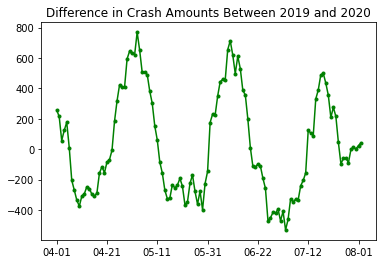

In [14]:
plt.plot(merged_on_day.Day, merged_on_day.Diff, 'g.-')
plt.title("Difference in Crash Amounts Between 2019 and 2020")
plt.xticks(merged_on_day.Day[::20])
plt.show()